In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Loading the data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
# Aggregating the customer features
customer_features = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',   
    'Quantity': 'sum',    
}).reset_index()

# Adding the customer-specific data
customer_features = customer_features.merge(customers, on='CustomerID')
customer_features['SignupDays'] = (pd.Timestamp.now() - pd.to_datetime(customer_features['SignupDate'])).dt.days

# Selecting the relevant features
clustering_data = customer_features[['TotalValue', 'Quantity', 'SignupDays']]


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)


In [5]:
# Let's apply K-means Clustering Algortihm
kmeans = KMeans(n_clusters=4, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_data)


In [6]:
db_index = davies_bouldin_score(scaled_data, customer_features['Cluster'])
print('Davies-Bouldin Index:', db_index)


Davies-Bouldin Index: 0.8332101559650619


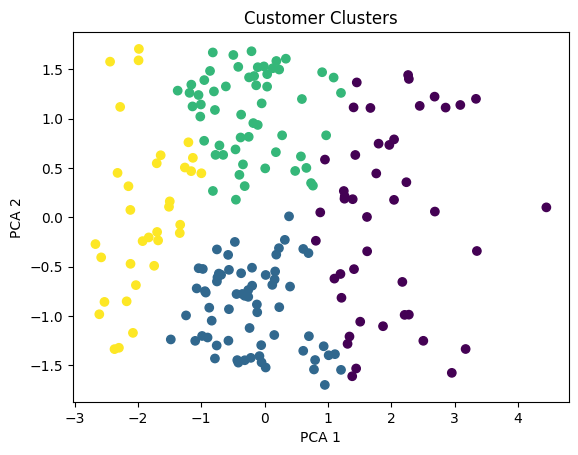

In [7]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Visualizing the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_features['Cluster'], cmap='viridis')
plt.title('Customer Clusters')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


In [8]:
customer_features.to_csv('Clustering_Results.csv', index=False)
